In [1]:
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [4]:
!pip install gradio pillow openai

In [2]:
import torch
from transformers import AutoModelForVision2Seq, AutoProcessor
from transformers.image_utils import load_image


# Initialize processor and model
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-256M-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-256M-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2" if DEVICE == "cuda" else "eager",
).to(DEVICE)

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


config.json:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.


generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

In [4]:
model.model.text_model

LlamaModel(
  (embed_tokens): Embedding(49280, 576, padding_idx=2)
  (layers): ModuleList(
    (0-29): 30 x LlamaDecoderLayer(
      (self_attn): LlamaAttention(
        (q_proj): Linear(in_features=576, out_features=576, bias=False)
        (k_proj): Linear(in_features=576, out_features=192, bias=False)
        (v_proj): Linear(in_features=576, out_features=192, bias=False)
        (o_proj): Linear(in_features=576, out_features=576, bias=False)
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
        (up_proj): Linear(in_features=576, out_features=1536, bias=False)
        (down_proj): Linear(in_features=1536, out_features=576, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
      (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
    )
  )
  (norm): LlamaRMSNorm((576,), eps=1e-05)
  (rotary_emb): LlamaRotaryEmbedding()
)

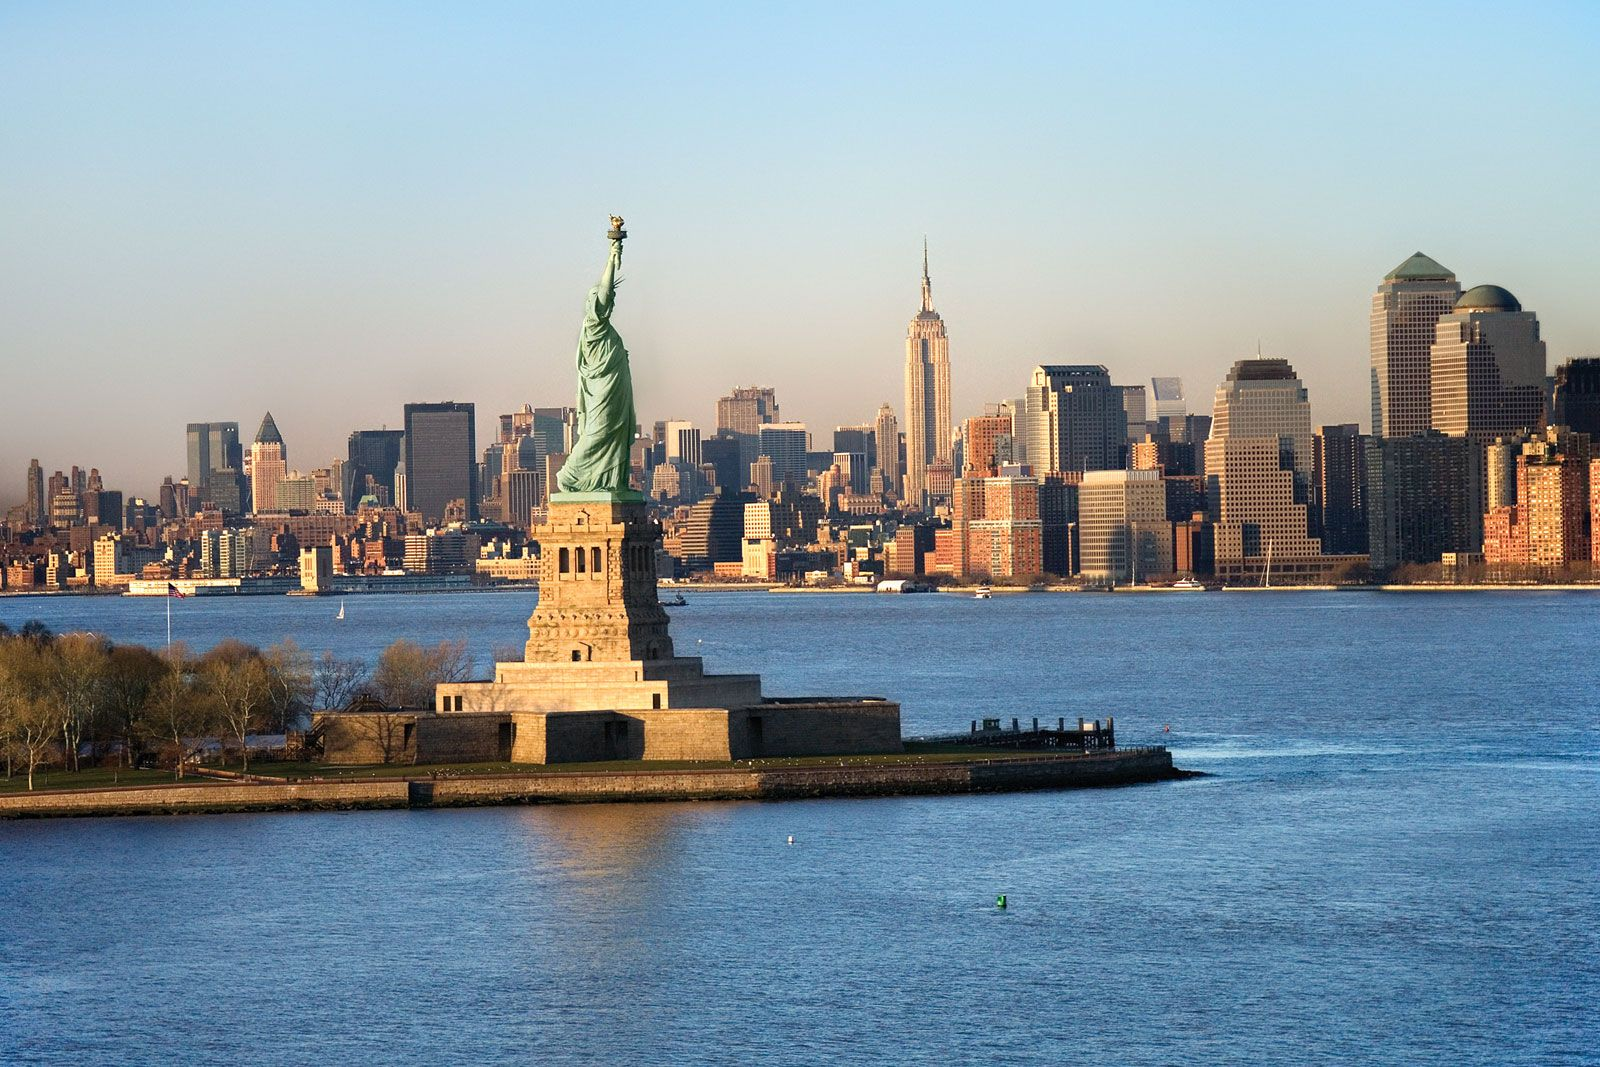

In [3]:
# Load images
image = load_image("https://cdn.britannica.com/61/93061-050-99147DCE/Statue-of-Liberty-Island-New-York-Bay.jpg")
image

In [4]:
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Can you describe this image?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])


User:



Can you describe this image?
Assistant: The image depicts a large, historic statue of liberty, located in New York City. The statue is a green, cylindrical statue of liberty, which is a figure of liberty, a person of color, and a woman, who is believed to be a descendant of the original French colonists who established the first American colonies. The statue is situated on a small pedestal, which is attached to a cylindrical tower, which is the pedestal of the Liberty Island monument. The pedestal is supported by a series of columns and arches, and it is surrounded by a large, open area, likely a plaza or a plaza park.

In the background, there is a large cityscape with a variety of buildings, including skyscrapers and high-rise buildings. The sky is clear, with a gradient of colors transitioning from a pale blue at the top to a deeper blue at the bottom. The buildings are mostly made of glass and steel, and they reflect the sunlight, creating a bright and sunny atmosphere.

T